# Intro to Convolutions

## Set up

In [1]:
%matplotlib inline
import math, sys, os, numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage import correlate, convolve  # Change here
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    # plt.show(im)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

## MNIST Data

In [4]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

C:\Users\Sudheer Pulapa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  <class 'pandas.core.frame.DataFrame'>


In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [7]:
images = np.reshape(mnist['data'], (70000, 28, 28))
labels = mnist['target'].astype(int)
n=len(images)
images.shape, labels.shape

((70000, 28, 28), (70000,))

In [8]:
images = images/255

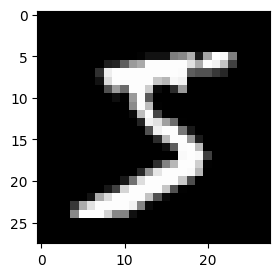

In [9]:
plot(images[0])

In [10]:
labels[0]

5

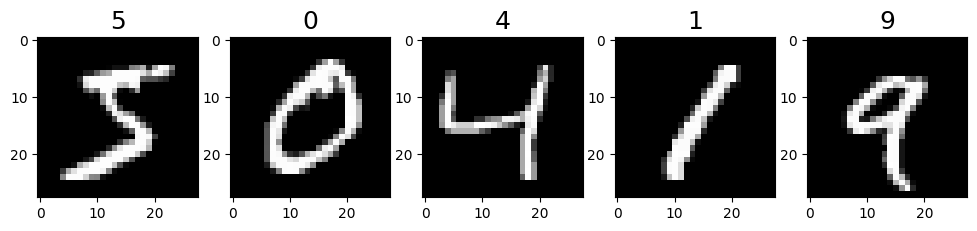

In [11]:
plots(images[:5], titles=labels[:5])

we can zoom in on part of the image

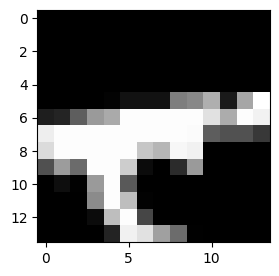

In [12]:
plot(images[0,0:14, 8:22])

## Edge Detection

We will look at how to create an Edge detector:

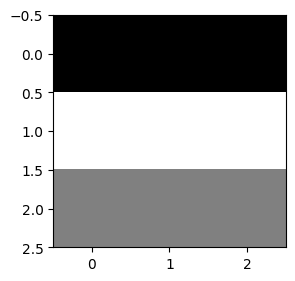

In [13]:
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)

In [14]:
dims = np.index_exp[10:28:1,3:13]
images[0][dims]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0549, 0.0039, 0.6039, 0.9922],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.5451, 0.9922],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0431, 0.7451],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1373],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1529],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0941, 0.4471, 0.8667],
       [0.    , 0.   

In [15]:
corrtop = correlate(images[0], top)

In [16]:
corrtop[dims]

array([[ 0.    ,  0.    ,  0.    ,  0.    , -0.3137, -0.8706, -1.2863, -1.3608, -0.8039, -0.8392],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.0549, -0.0588, -0.1176, -0.0627,  0.3333],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.502 , -0.749 , -0.502 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.0431, -0.651 , -0.698 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.1373, -0.7647],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.3176],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.1529,  0.7333],
       [ 0

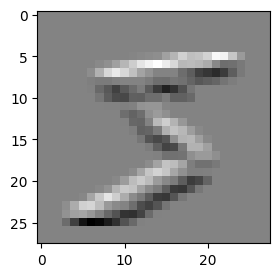

In [17]:
plot(corrtop)

In [18]:
np.rot90(top, 1)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

True

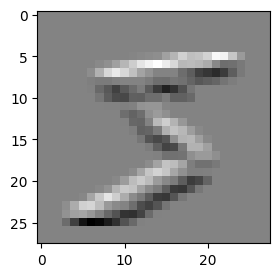

In [19]:
convtop = convolve(images[0], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop)

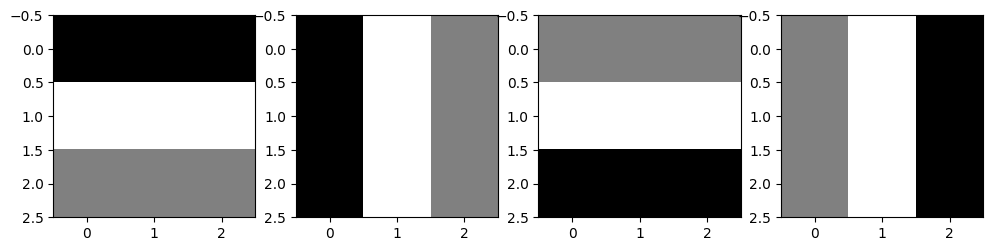

In [20]:
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

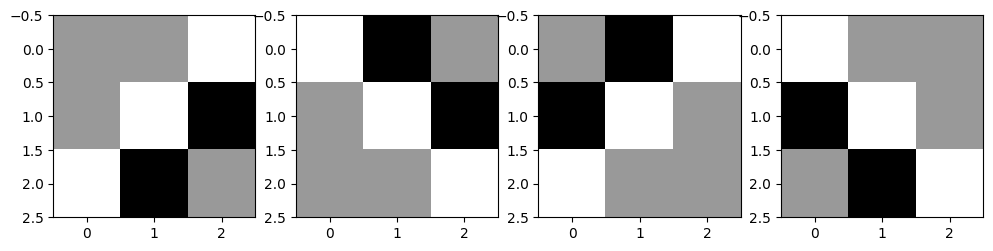

In [21]:
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

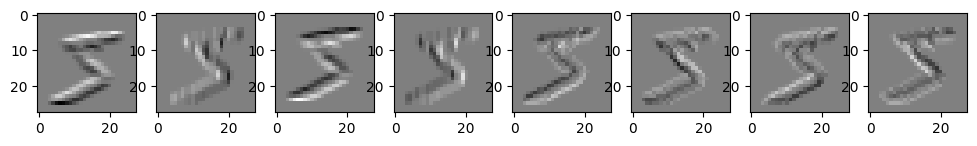

In [22]:
rots = straights + diags
corrs = [correlate(images[0], rot) for rot in rots]
plots(corrs)

In [23]:
eights=[images[i] for i in range(n) if labels[i]==8]
ones=[images[i] for i in range(n) if labels[i]==1]

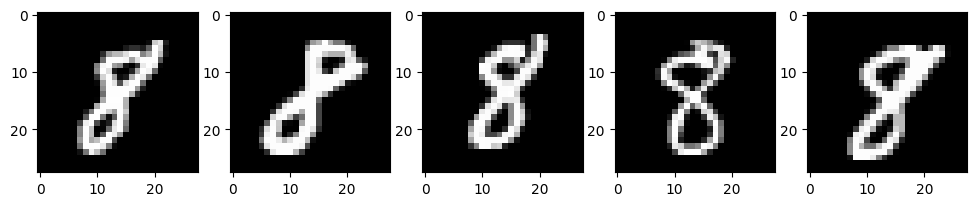

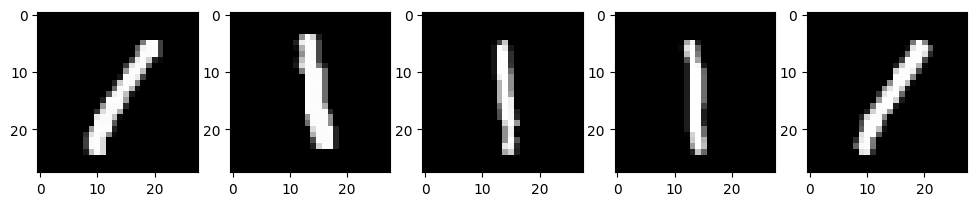

In [24]:
plots(eights[:5])
plots(ones[:5])

In [25]:
def normalize(arr): return (arr-arr.mean())/arr.std()

In [26]:
filts8 = np.array([ims.mean(axis=0) for ims in pool8])
filts8 = normalize(filts8)

NameError: name 'pool8' is not defined

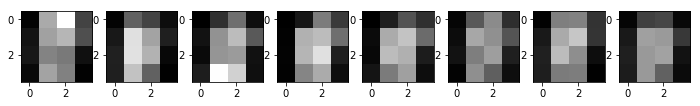

In [80]:
plots(filts8)

In [30]:
pool1 = [np.array([pool(correlate(im, rot)) for im in ones]) for rot in rots]
filts1 = np.array([ims.mean(axis=0) for ims in pool1])
filts1 = normalize(filts1)

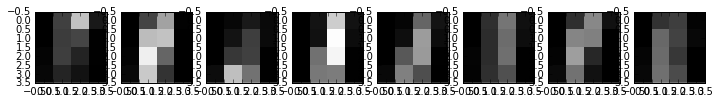

In [31]:
plots(filts1)

In [32]:
def pool_corr(im): return np.array([pool(correlate(im, rot)) for rot in rots])

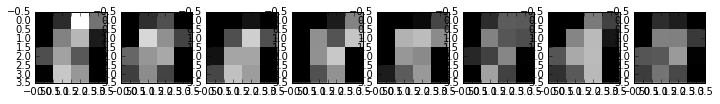

In [33]:
plots(pool_corr(eights[0]))

In [35]:
def sse(a,b): return ((a-b)**2).sum()
def is8_n2(im): return 1 if sse(pool_corr(im),filts1) > sse(pool_corr(im),filts8) else 0

In [36]:
sse(pool_corr(eights[0]), filts8), sse(pool_corr(eights[0]), filts1)

(126.77776, 181.26105)

In [37]:
[np.array([is8_n2(im) for im in ims]).sum() for ims in [eights,ones]]

[5223, 287]

In [38]:
[np.array([(1-is8_n2(im)) for im in ims]).sum() for ims in [eights,ones]]

[166, 5892]

In [ ]:
def n1(a,b): return (np.fabs(a-b)).sum()
def is8_n1(im): return 1 if n1(pool_corr(im),filts1) > n1(pool_corr(im),filts8) else 0

In [ ]:
[np.array([is8_n1(im) for im in ims]).sum() for ims in [eights,ones]]

In [ ]:
[np.array([(1-is8_n1(im)) for im in ims]).sum() for ims in [eights,ones]]

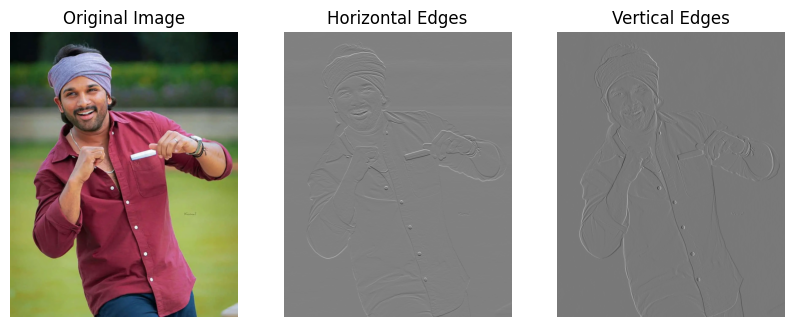

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import color
from skimage.io import imread

# Read the image
image = imread("D:\\8.OpenCV\\images\\allu2.jpeg")

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Define Sobel kernels for horizontal and vertical edge detection
sobel_horizontal = np.array([[1, 2, 1],
                              [0, 0, 0],
                              [-1, -2, -1]])

sobel_vertical = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]])

# Apply convolutions to detect horizontal and vertical edges
edges_horizontal = convolve(gray_image, sobel_horizontal)
edges_vertical = convolve(gray_image, sobel_vertical)

# Compute the magnitude of gradients
magnitude = np.sqrt(edges_horizontal**2 + edges_vertical**2)

# Plot the original image and edges
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(edges_horizontal, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

plt.subplot(133)
plt.imshow(edges_vertical, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.show()


In [30]:
def f(x):
    if x <= 1/2:
        return 2 * x
    if x > 1/2:
        return 2*x - 1

In [31]:
x = 1/10
for i in range(80):
    print(x)
    x = f(x)

0.1
0.2
0.4
0.8
0.6000000000000001
0.20000000000000018
0.40000000000000036
0.8000000000000007
0.6000000000000014
0.20000000000000284
0.4000000000000057
0.8000000000000114
0.6000000000000227
0.20000000000004547
0.40000000000009095
0.8000000000001819
0.6000000000003638
0.2000000000007276
0.4000000000014552
0.8000000000029104
0.6000000000058208
0.20000000001164153
0.40000000002328306
0.8000000000465661
0.6000000000931323
0.20000000018626451
0.40000000037252903
0.8000000007450581
0.6000000014901161
0.20000000298023224
0.4000000059604645
0.800000011920929
0.6000000238418579
0.20000004768371582
0.40000009536743164
0.8000001907348633
0.6000003814697266
0.20000076293945312
0.40000152587890625
0.8000030517578125
0.600006103515625
0.20001220703125
0.4000244140625
0.800048828125
0.60009765625
0.2001953125
0.400390625
0.80078125
0.6015625
0.203125
0.40625
0.8125
0.625
0.25
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [32]:
import numpy as np
import scipy.linalg as la

A = np.array([[1., 1000], [0, 1]])
B = np.array([[1, 1000], [0.001, 1]])

eigenvalues_A, _ = la.eig(A)
eigenvalues_B, _ = la.eig(B)

print("Eigenvalues of Matrix A:", eigenvalues_A)
print("Eigenvalues of Matrix B:", eigenvalues_B)

Eigenvalues of Matrix A: [1.+0.j 1.+0.j]
Eigenvalues of Matrix B: [2.+0.j 0.+0.j]


In [33]:
np.set_printoptions(suppress=True, precision=4)

In [34]:
wA, vrA = la.eig(A)
wB, vrB = la.eig(B)

wA, wB

(array([1.+0.j, 1.+0.j]), array([2.+0.j, 0.+0.j]))

In [35]:
import numpy as np

# Suppose we have two arrays of numbers
array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([6, 7, 8, 9, 10])

# Adding the elements of the arrays using vectorization
result = array1 + array2

print("Result of adding arrays using vectorization:", result)


Result of adding arrays using vectorization: [ 7  9 11 13 15]


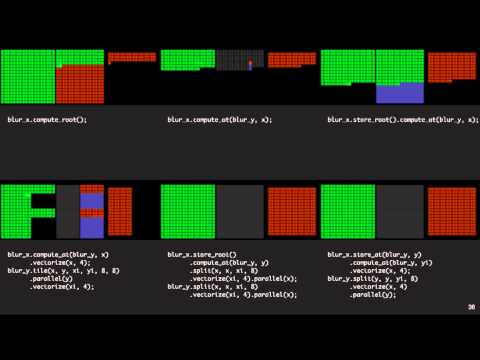

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo("3uiEyEKji0M")